# Utilizando algoritmo classificador de Árvore de Decisão para a previsão de pagamento 

In [1]:
# Importando a biblioteca para a classificação em Random Forest e a biblioteca que irá carregar os dados de treinamento e teste, além da biblioteca para visualizar a árvore em png 
import pickle
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [2]:
with open("base.pkl", "rb") as df:
    X_base_treinamento, y_base_treinamento, X_base_teste, y_base_teste = pickle.load(df)

In [4]:
# Verificando o shape dos atributos
X_base_treinamento.shape, y_base_treinamento.shape

((1500, 3), (1500,))

In [3]:
X_base_teste.shape, y_base_teste.shape

((500, 3), (500,))

In [5]:
# Primeiros testes do classificador de Árvore de Decisão
arvore_decisao = DecisionTreeClassifier(criterion="entropy", random_state=0)
arvore_decisao.fit(X_base_treinamento, y_base_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [6]:
previsao = arvore_decisao.predict(X_base_teste)

In [9]:
# Visualizando a Acurácia do algoritmo
from sklearn.metrics import accuracy_score, classification_report

print(f"A precisão do algoritmo foi de {accuracy_score(y_base_teste, previsao) * 100}%")

A precisão do algoritmo foi de 98.2%


0.982

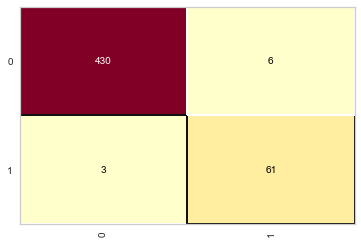

In [14]:
# Visualizando onde está a maior precisão do algoritmo, se no pagante ou não-pagante. Neste caso é nos não-pagantes, o que seria o ideal visto que o objetivo do algoritmo seria evitar a perda de dinheiro por emprestimo de um banco. 
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(arvore_decisao)
cm.fit(X_base_treinamento, y_base_treinamento)
cm.score(X_base_teste, y_base_teste)

In [15]:
print(classification_report(y_base_teste, previsao))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



#### O algoritmo consegue identificar corretamente 99% dos dados da classe 0 (Pagantes) com uma precisão de 99% e 95% dos dados da classe 1 (Não-Pagantes) com uma precisão de 91%.

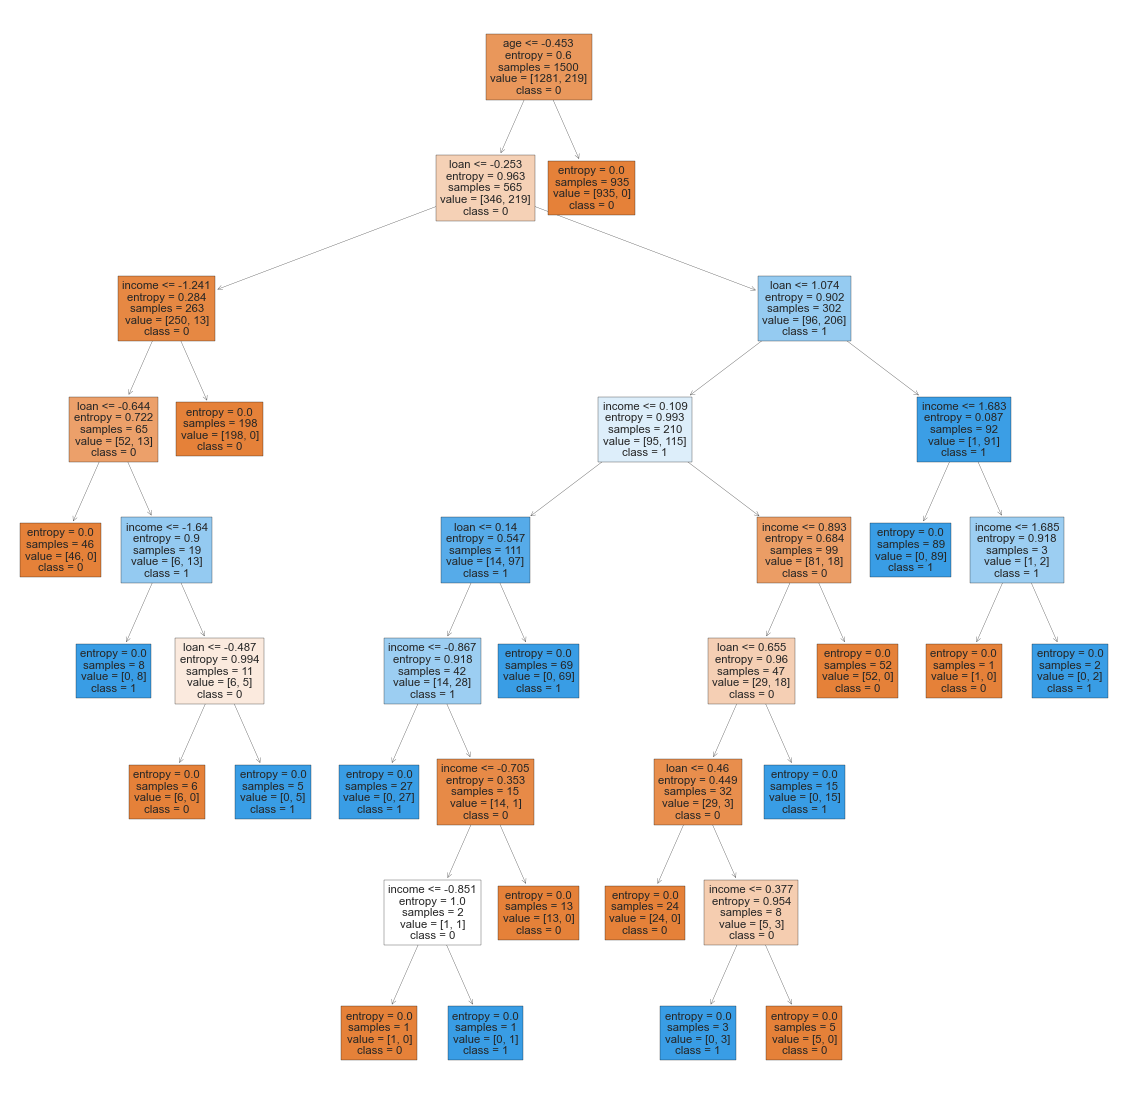

In [13]:
from sklearn import tree

previsores = ["income", "age", "loan"]
fig, eixos = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
tree.plot_tree(arvore_decisao, feature_names=previsores, class_names=["0", "1"], filled=True);

### Desenho basico da Árore de decisão. Um modelo mais detalhado foi contruido no Power Bi.

# FIM